<a href="https://colab.research.google.com/github/Lohcinceat/Data-Analytic-Assigment/blob/main/1_7003_Group_Assignment_6_Latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction Using Machine Learning Model

# Initial Question


1. Will sex , age and race of a person affect the risk of a person getting heart disease?

2. Will people who has habits of  drink alcohol and smoke cigarettes have a higher risk of getting heart disease than people who don't?

3. What is the previously diagnoses health issues such as stroke, diabetic, asthma or kidey diseases that is closely related to the occuring of heart disease?

4. What is the current health condition such as BMI, physical health, mental health or sleep time that is closely related to the occuring of heart disease?

5. Which machine learning model will generate the highest accuracy in prediction of heart disease after comparing the results from different types of models?

# Overview and Motivation

  Heart disease is a broad term that refers to a variety of illnesses that affect the heart. Heart disease encompasses a variety of conditions affecting the blood vessels, including coronary artery disease, heart rhythm abnormalities (arrhythmias), and congenital heart defects. 
  
  In this project, we will be applying Machine Learning approaches for classifying whether a person is suffering from heart disease or not, using dataset compiled from the Arizona Department of Health Services(ADHS). The dataset is a significant part of the Arizona Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to collect data on the health status of U.S. Arizona state residents. The data set contains 10291 rows and 445 columns of responses to questions concerning respondents' health status. Due to the large number of factors that influence heart disease directly or indirectly, 15 variables are chosen to represent the most relevant variables.
   
   Heart disease is one of the leading causes of illness and death worldwide. However, it is difficult to diagnose heart disease because it is influenced by a variety of risk factors, including diabetes, high blood pressure, excessive cholesterol, irregular pulse rate, and many other factors. As a results, prediction of heart disease is recognised as one of the most critical subjects in the field of clinical data analysis. By combining data analysis and machine learning , it is possible to transform a massive collection of raw healthcare data into information that can be used to make informed decisions and forecasts.

# Objective:
 Build machine learning model which provide the most accurate prediction for heart disease.

# Related Work

https://towardsdatascience.com/heart-disease-prediction-73468d630cfc

Which is a website that published the building of heart disease prediction models by using dataset from Cleveland Heart Disease(UCI Repository) dataset.

# Source of Dataset

Source :https://azdhs.gov/preparedness/public-health-statistics/behavioral-risk-factor-surveillance/index.php#data-code-book

Name   :Arizona Behavioral Risk Factor Surveillance System

Due to the complexity of the original dataset variable's names, the names of variables for each column in the original dataset were modified as follows：
![image.png](attachment:image.png)

# Explanation of the variables of the dataset

1. Demografic 
 - Sex :Are you male or female?
 - AgeCategory: <br>Fourteen-level age category.
 -Race : <br>Imputed race/ethnicity value.

2. Living habits
 - Smoking : <br>Have you smoked at least 100 cigarettes in your entire life?. 
 - AlcoholDrinking : <br>Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week.
  - PhysicalActivity : <br>Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.



3. Health Issues (history):
 - Stroke : <br>Ever told you had a stroke?
 - Diabetic : <br>Ever told you had diabetes?
 - Asthma : <br>Ever told you had asthma?
 - KidneyDisease : <br>Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?



4. Health Condition ( current):
 - BMI : <br>Body Mass Index (BMI).
 - PhysicalHealth : <br>Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
 - MentalHealth : <br>Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
 - SleepTime : <br>On average, how many hours of sleep do you get in a 24-hour period?


5.  Predict variable (desired target):
 - HeartDisease : <br>Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
 

# Contents
## 1  Data Discovery
 1.1 Data Basic Information
 <br>1.2 Descriptive Data Summarization
## 2 Data Cleaning 
  2.1 Replace Values' Representation
 <br> 2.2  Remove Problematic Values
 <br> 2.3 Duplicated Values
 <br> 2.4 Identification and Imputation of Null Values
 <br> 2.5 Outliers 
## 3  Data Preprocessing
  3.1 Data Verification
 <br> 3.2 Cleaned and Processed Data

In [ ]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #seaborn is already installed

#add list of other libraries used here

In [ ]:
# load the dataset
df = pd.read_csv('https://github.com/Lohcinceat/Data-Analytic-Assigment/raw/main/Heart%20Disease%20.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease
0,2,2510.0,2.0,1,2,88,88,1,1,1,3,1,9,2,2
1,2,2500.0,2.0,1,2,14,88,1,6,1,1,1,8,2,2
2,2,1997.0,2.0,1,2,88,88,2,5,1,3,1,6,2,2
3,2,1974.0,1.0,1,2,88,88,2,6,1,3,1,8,2,2
4,2,2746.0,1.0,1,2,88,88,1,6,1,3,1,8,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10286,2,1966.0,2.0,1,2,88,88,2,6,1,3,1,8,2,2
10287,2,2170.0,1.0,1,2,88,30,1,1,1,3,1,7,2,2
10288,2,2880.0,1.0,1,2,88,5,1,2,1,3,1,7,2,2
10289,2,2663.0,2.0,1,2,88,88,1,3,5,3,1,9,2,2


The data set contains 10291 rows and 15 column with variables that are relatable to occurance of heart disease. 

# Data Discovery
## Data Basic Information

In [ ]:
# display the dimension of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      10291 non-null  int64  
 1   BMI               9167 non-null   float64
 2   Smoking           9709 non-null   float64
 3   AlcoholDrinking   10291 non-null  int64  
 4   Stroke            10291 non-null  int64  
 5   PhysicalHealth    10291 non-null  int64  
 6   MentalHealth      10291 non-null  int64  
 7   Sex               10291 non-null  int64  
 8   AgeCategory       10291 non-null  int64  
 9   Race              10291 non-null  int64  
 10  Diabetic          10291 non-null  int64  
 11  PhysicalActivity  10291 non-null  int64  
 12  SleepTime         10291 non-null  int64  
 13  Asthma            10291 non-null  int64  
 14  KidneyDisease     10291 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 1.2 MB


The output shows that this dataset consists of 10291 entries with 15 columns. All the variables have data types of integer except BMI and smoking having data types of float.  Two features namely BMI, Smoking have Null values.

In [ ]:
# display the total number of types of feature values in each attribute
df.nunique()

HeartDisease           4
BMI                 1458
Smoking                4
AlcoholDrinking        3
Stroke                 4
PhysicalHealth        32
MentalHealth          32
Sex                    2
AgeCategory            6
Race                   6
Diabetic               6
PhysicalActivity       4
SleepTime             23
Asthma                 4
KidneyDisease          4
dtype: int64

The output shows that we have 4 numerical features, which includes BMI, PhysicalHealth, MentalHealth and SleepTime. Other than that we have 11 categorical features with numbers of categories from 2 to 6.

#  Data Cleaning
## Changing and Replace Values' Representation

The BMI values in the original dataset is represented in range of 1 to 9999 which is different fom the standard BMI range of 1-99.99. Hence, they are required to be changed to the standard format by dividing it by 100 with 2 decimal places.

In [ ]:
df['BMI'] = round(df['BMI']/100,2)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease
0,2,25.10,2.0,1,2,88,88,1,1,1,3,1,9,2,2
1,2,25.00,2.0,1,2,14,88,1,6,1,1,1,8,2,2
2,2,19.97,2.0,1,2,88,88,2,5,1,3,1,6,2,2
3,2,19.74,1.0,1,2,88,88,2,6,1,3,1,8,2,2
4,2,27.46,1.0,1,2,88,88,1,6,1,3,1,8,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10286,2,19.66,2.0,1,2,88,88,2,6,1,3,1,8,2,2
10287,2,21.70,1.0,1,2,88,30,1,1,1,3,1,7,2,2
10288,2,28.80,1.0,1,2,88,5,1,2,1,3,1,7,2,2
10289,2,26.63,2.0,1,2,88,88,1,3,5,3,1,9,2,2


The variable "PhysicalHealth" and "MentalHealth" is supposely consists of numerical values of numbers of days in a month from 0-30, however there are also categorical feature mixed which are 88 for None, 77 for Dont know/Not sure and 99 for refused to answer. Since, 88 is represent as none it is assumed as 0 number of days.

In [ ]:
# Remove meaningless value for better analysis(7 - unknown, 9 - refused). 
# Standardize the representation of variable values in each attribute to 1 - yes, 2 - no.
index_list1 = df[~(df['HeartDisease'].isin ([1,2]))].index.tolist()
df = df.drop(index = index_list1)
index_list2 = df[~(df['Smoking'].isin ([1,2]))].index.tolist()
df = df.drop(index = index_list2)
index_list3 = df[~(df['AlcoholDrinking'].isin ([1,2]))].index.tolist()
df = df.drop(index = index_list3)
index_list4 = df[~(df['Stroke'].isin ([1,2]))].index.tolist()
df = df.drop(index = index_list4)
index_list6 = df[~(df['PhysicalActivity'].isin ([1,2]))].index.tolist()
df = df.drop(index = index_list6)
index_list7 = df[~(df['Asthma'].isin ([1,2]))].index.tolist()
df = df.drop(index = index_list7)
index_list8 = df[~(df['KidneyDisease'].isin ([1,2]))].index.tolist()
df = df.drop(index = index_list8)

# Special case: the values in the 'diabetic' column are represented as 1, 2 - yes, 3, 4 - no 
index_list5 = df[~(df['Diabetic'].isin ([1,2,3,4]))].index.tolist()
df = df.drop(index = index_list5)

df 

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease
0,2,25.10,2.0,1,2,88,88,1,1,1,3,1,9,2,2
1,2,25.00,2.0,1,2,14,88,1,6,1,1,1,8,2,2
2,2,19.97,2.0,1,2,88,88,2,5,1,3,1,6,2,2
3,2,19.74,1.0,1,2,88,88,2,6,1,3,1,8,2,2
4,2,27.46,1.0,1,2,88,88,1,6,1,3,1,8,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10286,2,19.66,2.0,1,2,88,88,2,6,1,3,1,8,2,2
10287,2,21.70,1.0,1,2,88,30,1,1,1,3,1,7,2,2
10288,2,28.80,1.0,1,2,88,5,1,2,1,3,1,7,2,2
10289,2,26.63,2.0,1,2,88,88,1,3,5,3,1,9,2,2


In [ ]:
df["PhysicalHealth"] = df["PhysicalHealth"].replace(88,0)
df["MentalHealth"] = df["MentalHealth"].replace(88,0)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease
0,2,25.10,2.0,1,2,0,0,1,1,1,3,1,9,2,2
1,2,25.00,2.0,1,2,14,0,1,6,1,1,1,8,2,2
2,2,19.97,2.0,1,2,0,0,2,5,1,3,1,6,2,2
3,2,19.74,1.0,1,2,0,0,2,6,1,3,1,8,2,2
4,2,27.46,1.0,1,2,0,0,1,6,1,3,1,8,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10286,2,19.66,2.0,1,2,0,0,2,6,1,3,1,8,2,2
10287,2,21.70,1.0,1,2,0,30,1,1,1,3,1,7,2,2
10288,2,28.80,1.0,1,2,0,5,1,2,1,3,1,7,2,2
10289,2,26.63,2.0,1,2,0,0,1,3,5,3,1,9,2,2


In [ ]:
df["HeartDisease"] = df["HeartDisease"].replace(2,0)
df["Smoking"] = df["Smoking"].replace(2,0)
df["AlcoholDrinking"] = df["AlcoholDrinking"].replace(2,0)
df["Stroke"] = df["Stroke"].replace(2,0)
df["Sex"] = df["Sex"].replace(2,0)
df["Diabetic"] = df["Diabetic"].replace(2,1)
df["Diabetic"] = df["Diabetic"].replace(3,0)
df["Diabetic"] = df["Diabetic"].replace(4,0)
df["PhysicalActivity"] = df["PhysicalActivity"].replace(2,0)
df["Asthma"] = df["Asthma"].replace(2,0)
df["KidneyDisease"] = df["KidneyDisease"].replace(2,0)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease
0,0,25.10,0.0,1,0,0,0,1,1,1,0,1,9,0,0
1,0,25.00,0.0,1,0,14,0,1,6,1,1,1,8,0,0
2,0,19.97,0.0,1,0,0,0,0,5,1,0,1,6,0,0
3,0,19.74,1.0,1,0,0,0,0,6,1,0,1,8,0,0
4,0,27.46,1.0,1,0,0,0,1,6,1,0,1,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10286,0,19.66,0.0,1,0,0,0,0,6,1,0,1,8,0,0
10287,0,21.70,1.0,1,0,0,30,1,1,1,0,1,7,0,0
10288,0,28.80,1.0,1,0,0,5,1,2,1,0,1,7,0,0
10289,0,26.63,0.0,1,0,0,0,1,3,5,0,1,9,0,0


## Remove Problematic Values

Data for variable of 'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalActivity', 'Asthma', 'KidneyDisease' and 'Diabetic' comes with answer of 7 and 9 which equal to unknown and to refused to answer respectively. In this analysis, the unknown and refused answer is assumed to be missing not at random (MNAR) value, hence, the row with number 7 and 9 is deleted from the dataset.

In the original data, the entry of variable 'Smoking' is in the form of float which is 1.0 and 2.0. Hence, it is corrected to categorical value of 1 and 2 with data type of integer.

In [ ]:
#  Tranform floats in Smoking column to integer
df['Smoking'] = pd.to_numeric(df['Smoking']).round(0).astype(int) 
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease
0,0,25.10,0,1,0,0,0,1,1,1,0,1,9,0,0
1,0,25.00,0,1,0,14,0,1,6,1,1,1,8,0,0
2,0,19.97,0,1,0,0,0,0,5,1,0,1,6,0,0
3,0,19.74,1,1,0,0,0,0,6,1,0,1,8,0,0
4,0,27.46,1,1,0,0,0,1,6,1,0,1,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10286,0,19.66,0,1,0,0,0,0,6,1,0,1,8,0,0
10287,0,21.70,1,1,0,0,30,1,1,1,0,1,7,0,0
10288,0,28.80,1,1,0,0,5,1,2,1,0,1,7,0,0
10289,0,26.63,0,1,0,0,0,1,3,5,0,1,9,0,0


## Checking Duplicated Values, Null Values, and Outliers

In [ ]:
# Check if there are duplicated data

print(df.duplicated().any())
print(sum(df.duplicated(keep="first"))," rows are duplicated")
df.duplicated().sum()
df[df.duplicated()==True]

True
230  rows are duplicated


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease
691,0,22.31,1,1,0,0,0,0,6,1,0,1,7,0,0
693,0,25.02,0,1,0,0,0,0,6,1,0,1,7,0,0
713,0,25.84,1,1,0,0,0,1,6,1,0,1,8,0,0
832,0,NaN,0,1,0,0,0,0,5,1,0,1,8,0,0
851,0,23.78,1,1,0,0,0,0,6,1,0,1,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10204,0,26.58,1,1,0,0,0,1,6,1,0,1,8,0,0
10213,0,25.09,0,1,0,0,0,1,6,1,0,1,8,0,0
10215,0,33.00,0,1,0,0,0,1,6,1,0,1,7,0,0
10235,0,25.52,0,1,0,0,0,1,6,1,0,1,8,0,0


The dataset is checked with 220 duplicated rows. However, due to huge sample collected, there are huge chance of similar entry of answer between individuals. Hence, the duplicated data is assume to be normal and not processed.

In [ ]:
# Check Null values in the dataset
df.isnull().sum()

HeartDisease          0
BMI                 624
Smoking               0
AlcoholDrinking       0
Stroke                0
PhysicalHealth        0
MentalHealth          0
Sex                   0
AgeCategory           0
Race                  0
Diabetic              0
PhysicalActivity      0
SleepTime             0
Asthma                0
KidneyDisease         0
dtype: int64

After checking the null values in the dataset, there are still have 624 null values found in BMI column.

## Imputation of Null Values - Using the Mean

To handle the missing data in the BMI column, imputation of mean value is used to fill the null value.

In [ ]:
# Imputate the Null values in the 'BMI' column with the mean.
BMI_mean = round(df['BMI'].mean(),2)
print(BMI_mean)
df["BMI"] = df["BMI"].fillna(BMI_mean)
df

27.9


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease
0,0,25.10,0,1,0,0,0,1,1,1,0,1,9,0,0
1,0,25.00,0,1,0,14,0,1,6,1,1,1,8,0,0
2,0,19.97,0,1,0,0,0,0,5,1,0,1,6,0,0
3,0,19.74,1,1,0,0,0,0,6,1,0,1,8,0,0
4,0,27.46,1,1,0,0,0,1,6,1,0,1,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10286,0,19.66,0,1,0,0,0,0,6,1,0,1,8,0,0
10287,0,21.70,1,1,0,0,30,1,1,1,0,1,7,0,0
10288,0,28.80,1,1,0,0,5,1,2,1,0,1,7,0,0
10289,0,26.63,0,1,0,0,0,1,3,5,0,1,9,0,0


In the columns of 'PhysicalHealth', 'MentalHealth' and 'SleepTime', there are still have number of 77 and 99 in the data which represent not sure and refused to answer. Both the number is treated as missing values and then replaced with mean number of days and time.  

In [ ]:
# Imputate the missing value ('77', '99') in the 'PhysicalHealth' column with the mean (77 - not sure, 99 - refused)
PhysicalHealth_sum = df[~(df['PhysicalHealth'].isin ([0,77,99]))]['PhysicalHealth'].sum()
PhysicalHealth_len = len(df[~(df['PhysicalHealth'].isin ([0,77,99]))]['PhysicalHealth'])
PhysicalHealth_mean = round(PhysicalHealth_sum / PhysicalHealth_len,0)
print("Mean of PhysicalHealth is",PhysicalHealth_mean)
df['PhysicalHealth'] = df["PhysicalHealth"].replace(77,PhysicalHealth_mean)
df['PhysicalHealth'] = df["PhysicalHealth"].replace(99,PhysicalHealth_mean)

# Imputate the missing value ('77', '99') in the 'MentalHealth' column with the mean (77 - not sure, 99 - refused)
MentalHealth_sum = df[~(df['MentalHealth'].isin ([0,77,99]))]['MentalHealth'].sum()
MentalHealth_len = len(df[~(df['MentalHealth'].isin ([0,77,99]))]['MentalHealth'])
MentalHealth_mean = round(MentalHealth_sum / MentalHealth_len,0)
print("Mean of MentalHealth is",MentalHealth_mean)
df['MentalHealth'] = df["MentalHealth"].replace(77,MentalHealth_mean)
df['MentalHealth'] = df["MentalHealth"].replace(99,MentalHealth_mean)

# Imputate the missing value ('77', '99') in the 'SleepTime' column with the mean (77 - not sure, 99 - refused)
SleepTime_sum = df[~(df['SleepTime'].isin ([77,99]))]['SleepTime'].sum()
SleepTime_len = len(df[~(df['SleepTime'].isin ([77,99]))]['SleepTime'])
SleepTime_mean = round(SleepTime_sum / SleepTime_len,0)
print("Mean of SleepTime is",SleepTime_mean)
df['SleepTime'] = df["SleepTime"].replace(77,SleepTime_mean)
df['SleepTime'] = df["SleepTime"].replace(99,SleepTime_mean)
df

Mean of PhysicalHealth is 12.0
Mean of MentalHealth is 11.0
Mean of SleepTime is 7.0


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease
0,0,25.10,0,1,0,0,0,1,1,1,0,1,9,0,0
1,0,25.00,0,1,0,14,0,1,6,1,1,1,8,0,0
2,0,19.97,0,1,0,0,0,0,5,1,0,1,6,0,0
3,0,19.74,1,1,0,0,0,0,6,1,0,1,8,0,0
4,0,27.46,1,1,0,0,0,1,6,1,0,1,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10286,0,19.66,0,1,0,0,0,0,6,1,0,1,8,0,0
10287,0,21.70,1,1,0,0,30,1,1,1,0,1,7,0,0
10288,0,28.80,1,1,0,0,5,1,2,1,0,1,7,0,0
10289,0,26.63,0,1,0,0,0,1,3,5,0,1,9,0,0


## Check if there are any outliers

The numerical data for BMI,PhysicalHealth, MentalHealth, and SleepTime columns is checked for outliers using boxplot and shown as below.

AxesSubplot(0.125,0.125;0.775x0.755)


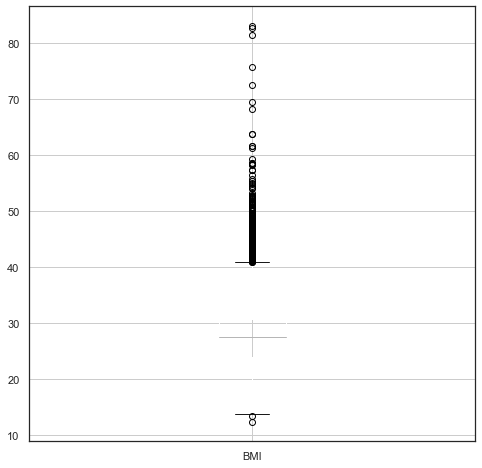

In [ ]:
# According to the boxplot below, all values in the BMI column are within the standard range of 1 - 99.99, so they are not processed here.
# The same is true for PhysicalHealth, MentalHealth, and SleepTime columns.

print(df.boxplot(column=['BMI']))

AxesSubplot(0.125,0.125;0.775x0.755)


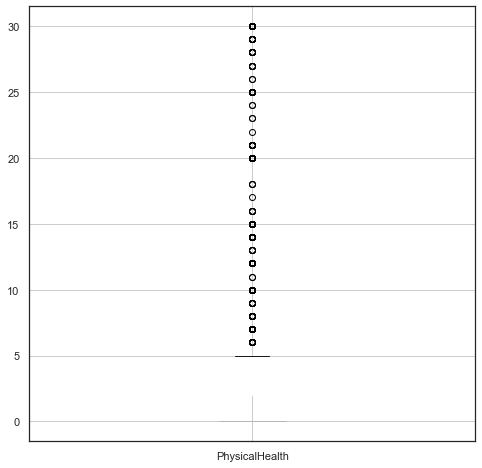

In [ ]:
print(df.boxplot(column=['PhysicalHealth']))

AxesSubplot(0.125,0.125;0.775x0.755)


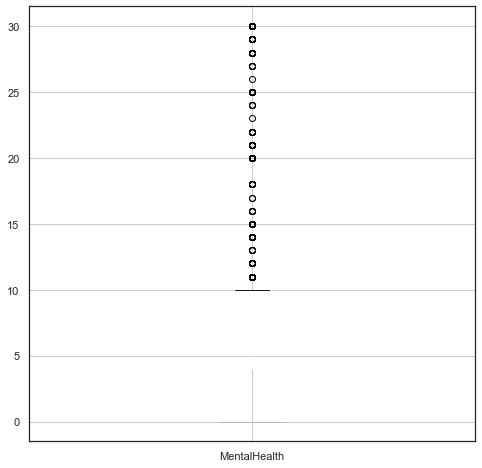

In [ ]:
print(df.boxplot(column=['MentalHealth']))

AxesSubplot(0.125,0.125;0.775x0.755)


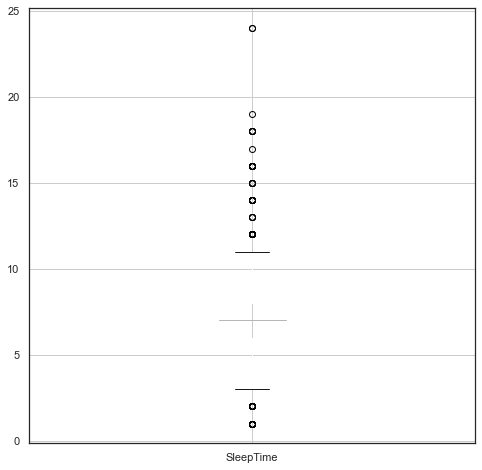

In [ ]:
print(df.boxplot(column=['SleepTime']))

From the boxplot above, the outlier are still in the required range of BMI 1-100, PhysicalHealth of 0-30 days and SleepTime of 0-24 hours. Hence it is treated as a useabel informative values.


## Data Verification

The data is then checked again to ensure the data is properly cleaned and processed.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9148 entries, 0 to 10290
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      9148 non-null   int64  
 1   BMI               9148 non-null   float64
 2   Smoking           9148 non-null   int32  
 3   AlcoholDrinking   9148 non-null   int64  
 4   Stroke            9148 non-null   int64  
 5   PhysicalHealth    9148 non-null   int64  
 6   MentalHealth      9148 non-null   int64  
 7   Sex               9148 non-null   int64  
 8   AgeCategory       9148 non-null   int64  
 9   Race              9148 non-null   int64  
 10  Diabetic          9148 non-null   int64  
 11  PhysicalActivity  9148 non-null   int64  
 12  SleepTime         9148 non-null   int64  
 13  Asthma            9148 non-null   int64  
 14  KidneyDisease     9148 non-null   int64  
dtypes: float64(1), int32(1), int64(13)
memory usage: 1.1 MB


All data type of the column is corected.

In [ ]:
# Check null values again for verfication
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
SleepTime           0
Asthma              0
KidneyDisease       0
dtype: int64

No Null values detected.

In [ ]:
# display the total number of types of feature values in each attribute
df.nunique()

HeartDisease           2
BMI                 1416
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        30
MentalHealth          30
Sex                    2
AgeCategory            6
Race                   6
Diabetic               2
PhysicalActivity       2
SleepTime             20
Asthma                 2
KidneyDisease          2
dtype: int64

All features are in reasonabe ranges and numbers.

## Cleaned and Processed Data

The final cleaned dataset is shown and write into a csv file

In [ ]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease
0,0,25.10,0,1,0,0,0,1,1,1,0,1,9,0,0
1,0,25.00,0,1,0,14,0,1,6,1,1,1,8,0,0
2,0,19.97,0,1,0,0,0,0,5,1,0,1,6,0,0
3,0,19.74,1,1,0,0,0,0,6,1,0,1,8,0,0
4,0,27.46,1,1,0,0,0,1,6,1,0,1,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10286,0,19.66,0,1,0,0,0,0,6,1,0,1,8,0,0
10287,0,21.70,1,1,0,0,30,1,1,1,0,1,7,0,0
10288,0,28.80,1,1,0,0,5,1,2,1,0,1,7,0,0
10289,0,26.63,0,1,0,0,0,1,3,5,0,1,9,0,0


# Exploratory Data Analysis

For easier visualization of the category labels, the numerical values of the labels is converted to description of the label.

In [ ]:
df2=df.copy()
df2["Sex"] = df2["Sex"].replace(0,"Female")
df2["Sex"] = df2["Sex"].replace(1,"Male")
df2["AgeCategory"] = df2["AgeCategory"].replace(1,"18 to 24")
df2["AgeCategory"] = df2["AgeCategory"].replace(2,"25 to 34")
df2["AgeCategory"] = df2["AgeCategory"].replace(3,"35-44")
df2["AgeCategory"] = df2["AgeCategory"].replace(4,"45-54")
df2["AgeCategory"] = df2["AgeCategory"].replace(5,"55-64")
df2["AgeCategory"] = df2["AgeCategory"].replace(6,"more than 65")
df2["Race"] = df2["Race"].replace(1,"White")
df2["Race"] = df2["Race"].replace(2,"Black")
df2["Race"] = df2["Race"].replace(3,"Asian")
df2["Race"] = df2["Race"].replace(4,"American indian/Alaskan Native")
df2["Race"] = df2["Race"].replace(5,"Hispanic")
df2["Race"] = df2["Race"].replace(6,"other race")



## Demographic Influence of Heart Disease

### Sex

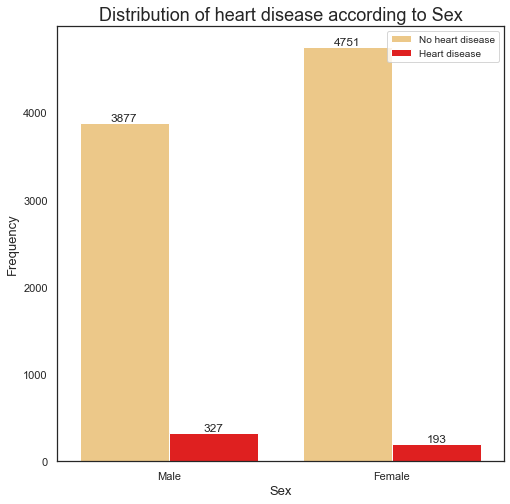

In [ ]:
ax = sns.countplot(x='Sex', data=df2, hue =df2['HeartDisease'],palette=sns.color_palette(['#fccc79', 'red']))
plt.xlabel('Sex', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of heart disease according to Sex', fontsize=18)
plt.legend(labels = ['No heart disease','Heart disease'],loc =1,fontsize = 10)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
female_with_heart_disease = len(df2[(df2['HeartDisease']==1) & (df2['Sex']=='Female')])
num_female = len(df2[df2['Sex']=='Female'])
male_with_heart_disease = len(df2[(df2['HeartDisease']==1) & (df2['Sex']=='Male')])
num_male = len(df2[df2['Sex']=='Male'])
print('Probability of Male to have Heart disease:', male_with_heart_disease/num_male)
print('Probability of Female to have Heart disease:', female_with_heart_disease/num_female)

Probability of Male to have Heart disease: 0.07778306374881065
Probability of Female to have Heart disease: 0.039037216828478966


Insight : 
1. Most heart disease patients are Male than Females
2. More Females were tested than males
3. Males are approximately 2 times more likely to have heart disease than females

### Age Category

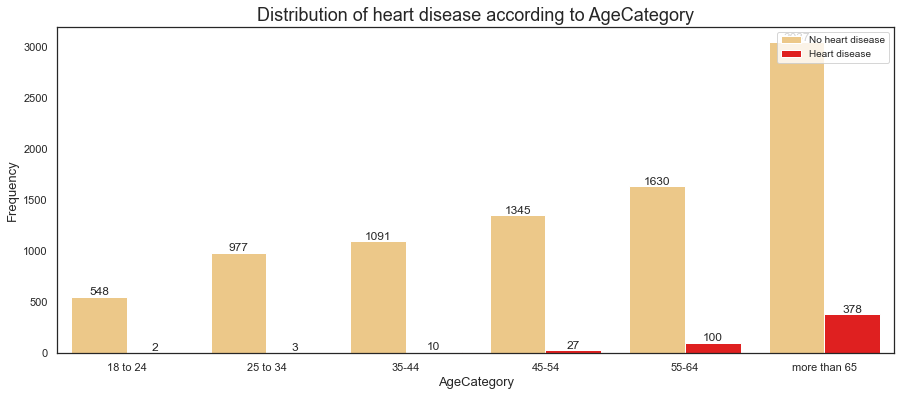

In [ ]:
fig, ax = plt.subplots(figsize = (15,6))
ax = sns.countplot(x='AgeCategory', data=df2, hue =df2['HeartDisease'],palette=sns.color_palette(['#fccc79', 'red']), order=["18 to 24","25 to 34", "35-44", "45-54", "55-64", "more than 65"])
plt.xlabel('AgeCategory', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of heart disease according to AgeCategory', fontsize=18)
plt.legend(labels = ['No heart disease','Heart disease'],loc =1,fontsize = 10)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Insight : 
1. The risk of getting heart disease is increase with age.


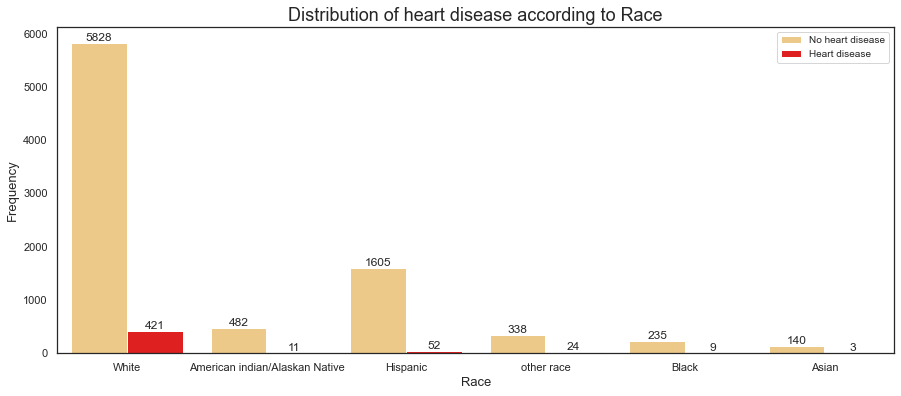

In [ ]:
fig, ax = plt.subplots(figsize = (15,6))
ax = sns.countplot(x='Race', data=df2, hue =df2['HeartDisease'],palette=sns.color_palette(['#fccc79', 'red']))
plt.xlabel('Race', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of heart disease according to Race', fontsize=18)
plt.legend(labels = ['No heart disease','Heart disease'],loc =1,fontsize = 10)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Insight : 
1. Most heart disease patients is white people.

## Habits of Respondent





### Smoking

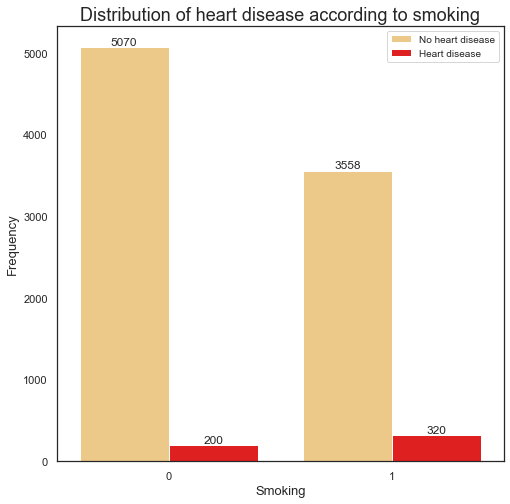

In [ ]:
ax = sns.countplot(x='Smoking', data=df2, hue =df2['HeartDisease'],palette=sns.color_palette(['#fccc79', 'red']))
plt.xlabel('Smoking', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of heart disease according to smoking', fontsize=18)
plt.legend(labels = ['No heart disease','Heart disease'],loc =1,fontsize = 10)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
smoke_and_heart_disease = len(df2[(df2['HeartDisease']==1) & (df2['Smoking']==1)])
num_smoke = len(df2[df2['Smoking']==1])
no_smoke_and_heart_disease = len(df2[(df2['HeartDisease']==1) & (df2['Smoking']==0)])
num_no_smoke = len(df2[df2['Smoking']==0])
print('Probability of Heart disease if you smoke:', smoke_and_heart_disease/num_smoke)
print("Probability of Heart disease if you don't smoke:", no_smoke_and_heart_disease/num_no_smoke)

Probability of Heart disease if you smoke: 0.08251676121712223
Probability of Heart disease if you don't smoke: 0.03795066413662239


Insight : 
1. Most smokers has heart disease.
2. Smokers are approximately 2.2 times more likely to have heart disease than females

### Physical Activities

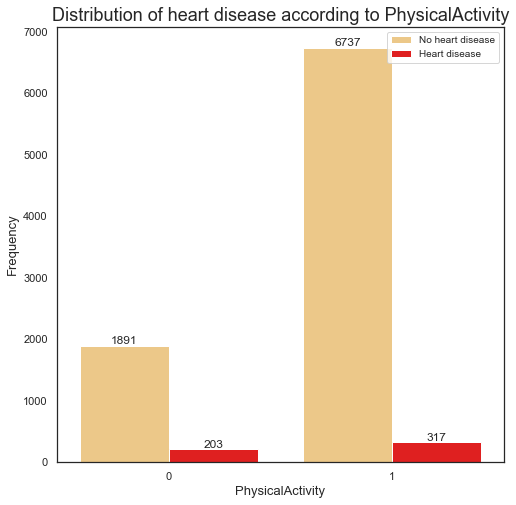

In [ ]:
ax = sns.countplot(x='PhysicalActivity', data=df2, hue =df2['HeartDisease'],palette=sns.color_palette(['#fccc79', 'red']))
plt.xlabel('PhysicalActivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of heart disease according to PhysicalActivity', fontsize=18)
plt.legend(labels = ['No heart disease','Heart disease'],loc =1,fontsize = 10)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
phy_and_heart_disease = len(df2[(df2['HeartDisease']==1) & (df2['PhysicalActivity']==1)])
num_phy = len(df2[df2['PhysicalActivity']==1])
no_phy_and_heart_disease = len(df2[(df2['HeartDisease']==1) & (df2['PhysicalActivity']==0)])
num_no_phy = len(df2[df2['PhysicalActivity']==0])
print('Probability of Heart disease if you have physical acyivities :', phy_and_heart_disease/num_phy)
print("Probability of Heart disease if you don't have physical acyivities:", no_phy_and_heart_disease/num_no_phy)

Probability of Heart disease if you have physical acyivities : 0.04493904167848029
Probability of Heart disease if you don't have physical acyivities: 0.09694364851957975


Insight : 
1. There are more people with physical activities than those who don't.
2. People with no physical activities are approximately 2.15 times more likely to have heart disease.

### Alcohol Drinking

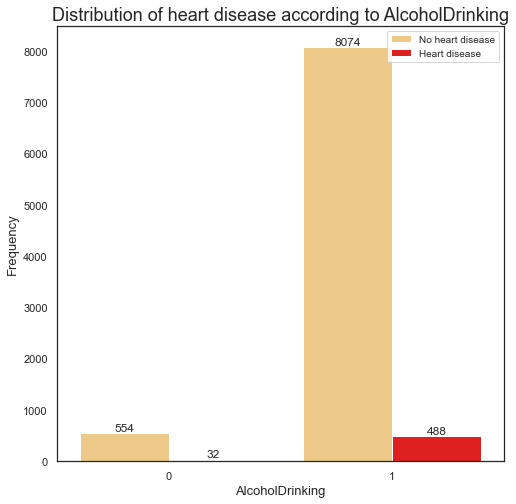

In [ ]:
ax = sns.countplot(x='AlcoholDrinking', data=df2, hue =df2['HeartDisease'],palette=sns.color_palette(['#fccc79', 'red']))
plt.xlabel('AlcoholDrinking', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of heart disease according to AlcoholDrinking', fontsize=18)
plt.legend(labels = ['No heart disease','Heart disease'],loc =1,fontsize = 10)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
drink_and_heart_disease = len(df2[(df2['HeartDisease']==1) & (df2['AlcoholDrinking']==1)])
num_drink = len(df2[df2['AlcoholDrinking']==1])
no_drink_and_heart_disease = len(df2[(df2['HeartDisease']==1) & (df2['AlcoholDrinking']==0)])
num_no_drink = len(df2[df2['AlcoholDrinking']==0])
print('Probability of Heart disease if you drink:', drink_and_heart_disease/num_drink)
print("Probability of Heart disease if you don't drink:", no_drink_and_heart_disease/num_no_drink)

Probability of Heart disease if you drink: 0.056996028965195046
Probability of Heart disease if you don't drink: 0.05460750853242321


Insight : 
1. Most peoples have behaviour of alcohol drinking. 
2. Alcohol drinker and non-alcohol drinker have almost the same chance to get heart disease.

## Previous Health Issues

### Stroke

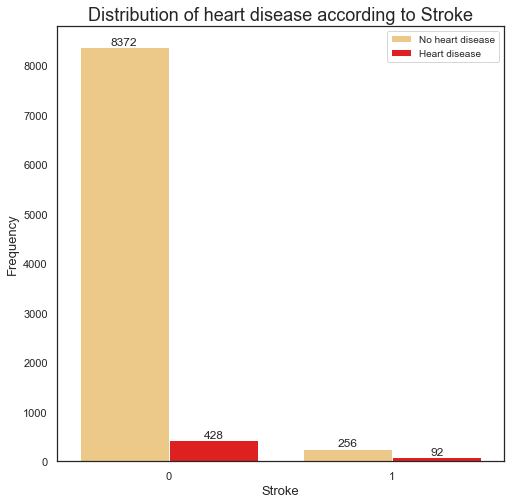

In [ ]:
ax =sns.countplot(x='Stroke', data=df2, hue =df2['HeartDisease'],palette=sns.color_palette(['#fccc79', 'red']))
plt.xlabel('Stroke', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of heart disease according to Stroke', fontsize=18)
plt.legend(labels = ['No heart disease','Heart disease'],loc =1,fontsize = 10)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
Stroke_and_heart_disease = len(df2[(df2['HeartDisease']==1) & (df2['Stroke']==1)])
num_Stroke = len(df2[df2['Stroke']==1])
no_Stroke_and_heart_disease = len(df2[(df2['HeartDisease']==1) & (df2['Stroke']==0)])
num_no_Stroke = len(df2[df2['Stroke']==0])
print('Probability of Heart disease if you have stroke:', Stroke_and_heart_disease/num_Stroke)
print("Probability of Heart disease if you don't have stroke:", no_Stroke_and_heart_disease/num_no_Stroke)

Probability of Heart disease if you have stroke: 0.26436781609195403
Probability of Heart disease if you don't have stroke: 0.04863636363636364


Insight : 
1. Most of the respondent doesn't have stroke.
2. Stroke patient are approximately 5.5 times more likely to have heart disease.

### Diabetic

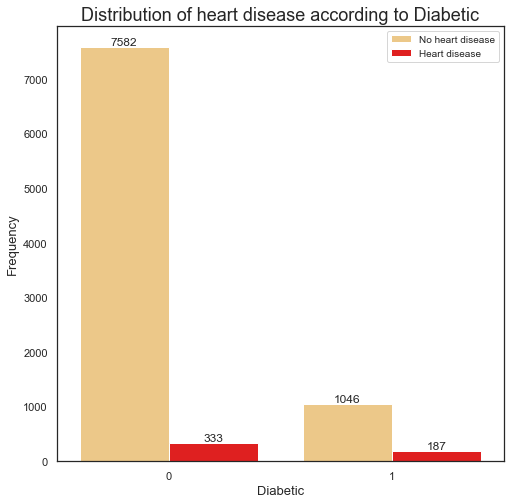

In [ ]:
ax = sns.countplot(x='Diabetic', data=df2, hue =df2['HeartDisease'],palette=sns.color_palette(['#fccc79', 'red']))
plt.xlabel('Diabetic', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of heart disease according to Diabetic', fontsize=18)
plt.legend(labels = ['No heart disease','Heart disease'],loc =1,fontsize = 10)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
Diabetic_and_heart_disease = len(df2[(df2['HeartDisease']==1) & (df2['Diabetic']==1)])
num_Diabetic = len(df2[df2['Diabetic']==1])
no_Diabetic_and_heart_disease = len(df2[(df2['HeartDisease']==1) & (df2['Diabetic']==0)])
num_no_Diabetic = len(df2[df2['Diabetic']==0])
print('Probability of Heart disease if you have diabetic:', Diabetic_and_heart_disease/num_Diabetic)
print("Probability of Heart disease if you don't have diabetic:", no_Diabetic_and_heart_disease/num_no_Diabetic)

Probability of Heart disease if you have diabetic: 0.1516626115166261
Probability of Heart disease if you don't have diabetic: 0.042072015161086544


Insight : 
1. Most of the respondent doesn't have diabetic.
2. Diabetic patient are approximately 3.6 times more likely to have heart disease.

### Kidney Disease

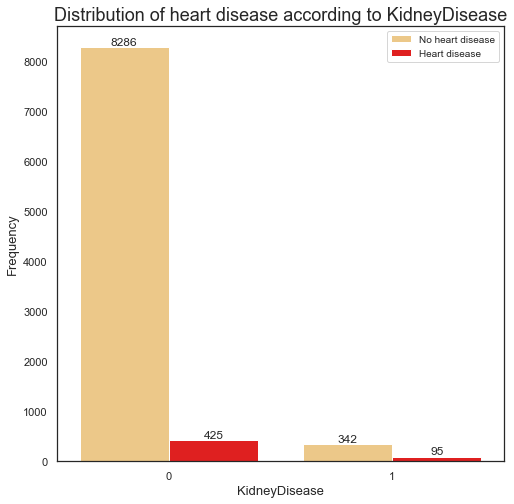

In [ ]:
ax = sns.countplot(x='KidneyDisease', data=df2, hue =df2['HeartDisease'],palette=sns.color_palette(['#fccc79', 'red']))
plt.xlabel('KidneyDisease', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of heart disease according to KidneyDisease', fontsize=18)
plt.legend(labels = ['No heart disease','Heart disease'],loc =1,fontsize = 10)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
kidneydisease_and_heart_disease = len(df2[(df2['HeartDisease']==1) & (df2['KidneyDisease']==1)])
num_kidneydisease = len(df2[df2['KidneyDisease']==1])
no_kidneydisease_and_heart_disease = len(df2[(df2['HeartDisease']==1) & (df2['KidneyDisease']==0)])
num_no_kidneydisease = len(df2[df2['KidneyDisease']==0])
print('Probability of Heart disease if you have kidney disease:', kidneydisease_and_heart_disease/num_kidneydisease)
print("Probability of Heart disease if you don't have kidney disease:", no_kidneydisease_and_heart_disease/num_no_kidneydisease)

Probability of Heart disease if you have kidney disease: 0.21739130434782608
Probability of Heart disease if you don't have kidney disease: 0.04878888761336241


Insight : 
1. Most of the respondent doesn't have kidney disease.
2. Kidney disease patients are approximately 4.4 times more likely to have heart disease.

### Asthma

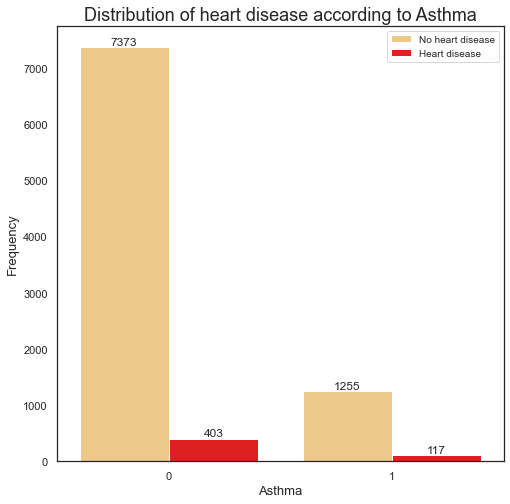

In [ ]:
ax = sns.countplot(x='Asthma', data=df2, hue =df2['HeartDisease'],palette=sns.color_palette(['#fccc79', 'red']))
plt.xlabel('Asthma', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of heart disease according to Asthma', fontsize=18)
plt.legend(labels = ['No heart disease','Heart disease'],loc =1,fontsize = 10)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
asthma_and_heart_disease = len(df2[(df2['HeartDisease']==1) & (df2['Asthma']==1)])
num_asthma = len(df2[df2['Asthma']==1])
no_asthma_and_heart_disease = len(df2[(df2['HeartDisease']==1) & (df2['Asthma']==0)])
num_no_asthma = len(df2[df2['Asthma']==0])
print('Probability of Heart disease if you have asthma:', asthma_and_heart_disease/num_asthma)
print("Probability of Heart disease if you don't have asthma:", no_asthma_and_heart_disease/num_no_asthma)

Probability of Heart disease if you have asthma: 0.08527696793002916
Probability of Heart disease if you don't have asthma: 0.051826131687242795


Insight : 
1. Most of the respondent doesn't have astma.
2. Asthma patients are approximately 1.6 times more likely to have heart disease.

## Current Health condition

### BMI

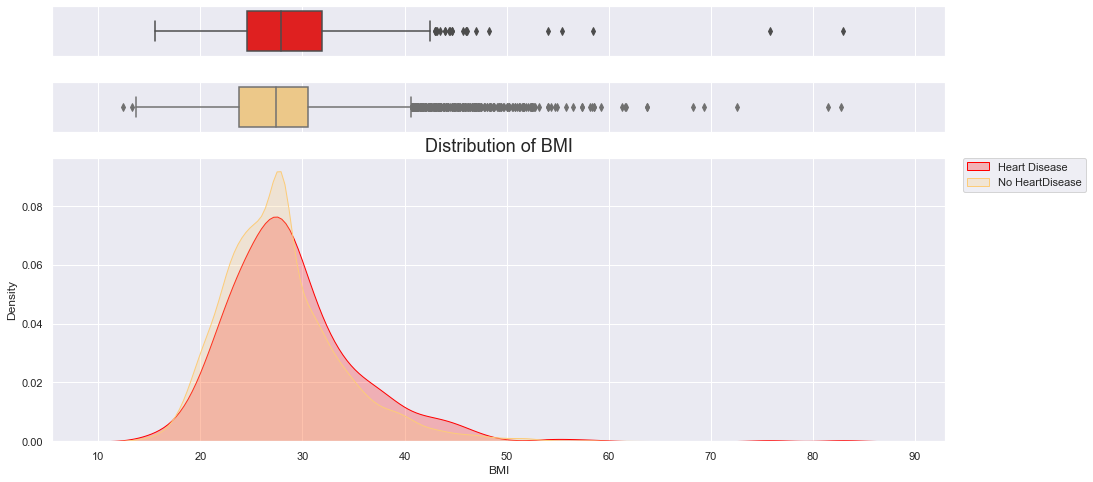

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
# assigning a graph to each ax
sns.boxplot(x=df2[df2['HeartDisease']==1]["BMI"], ax=ax_box1, color="red")
sns.kdeplot(df2[df2['HeartDisease']==1]["BMI"], ax=ax_hist,shade=True, color="red")

sns.boxplot(x=df2[df2['HeartDisease']==0]["BMI"], ax=ax_box2, color="#fccc79")
sns.kdeplot(df2[df2['HeartDisease']==0]["BMI"], ax=ax_hist, shade=True,color="#fccc79")

plt.title('Distribution of BMI', fontsize = 18)
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['Heart Disease', 'No HeartDisease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

**Insight:**
People with heart disease are found to have a higher BMI than people with no Heart Disease with a slighlty more right skew of the graph.


### Physical Health

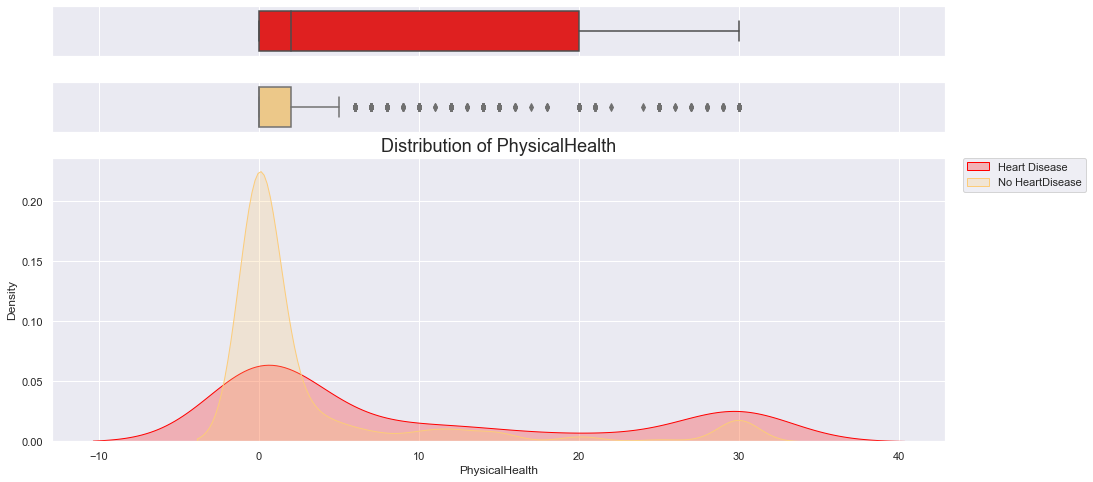

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
# assigning a graph to each ax
sns.boxplot(x=df2[df2['HeartDisease']==1]["PhysicalHealth"], ax=ax_box1, color="red")
sns.kdeplot(df2[df2['HeartDisease']==1]["PhysicalHealth"], ax=ax_hist,shade=True, color="red")

sns.boxplot(x=df2[df2['HeartDisease']==0]["PhysicalHealth"], ax=ax_box2, color="#fccc79")
sns.kdeplot(df2[df2['HeartDisease']==0]["PhysicalHealth"], ax=ax_hist, shade=True,color="#fccc79")

plt.title('Distribution of PhysicalHealth', fontsize = 18)
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['Heart Disease', 'No HeartDisease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

**Insight:**
People with heart disease are found likely to have significantly more days during the past 30 days where physical health is not good.


### Mental Health

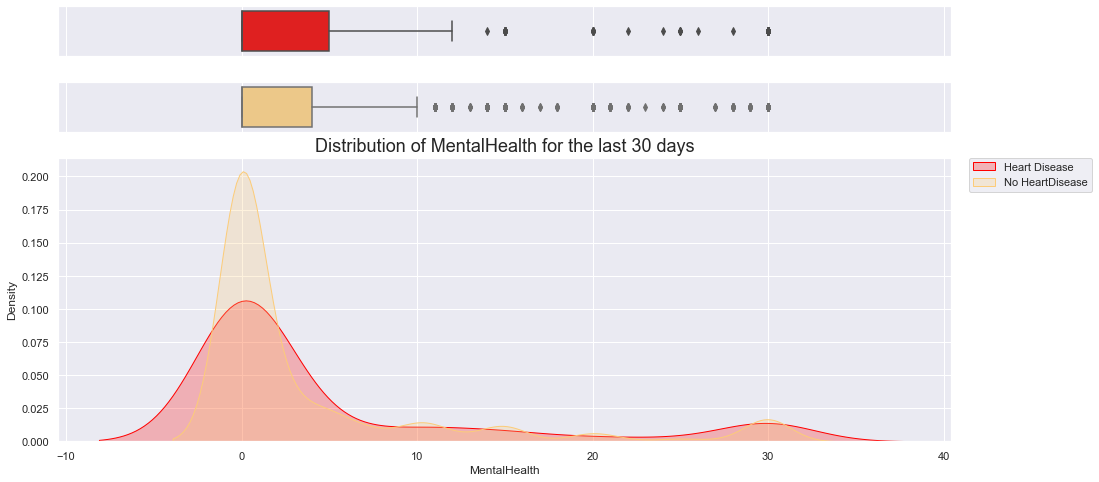

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
# assigning a graph to each ax
sns.boxplot(x=df2[df2['HeartDisease']==1]["MentalHealth"], ax=ax_box1, color="red")
sns.kdeplot(df2[df2['HeartDisease']==1]["MentalHealth"], ax=ax_hist,shade=True, color="red")

sns.boxplot(x=df2[df2['HeartDisease']==0]["MentalHealth"], ax=ax_box2, color="#fccc79")
sns.kdeplot(df2[df2['HeartDisease']==0]["MentalHealth"], ax=ax_hist, shade=True,color="#fccc79")

plt.title('Distribution of MentalHealth for the last 30 days', fontsize = 18)
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['Heart Disease', 'No HeartDisease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

**Insight:**
People with heart disease are found likely to have slightly more days during the past 30 days where mental health is not good.


### Sleep Time

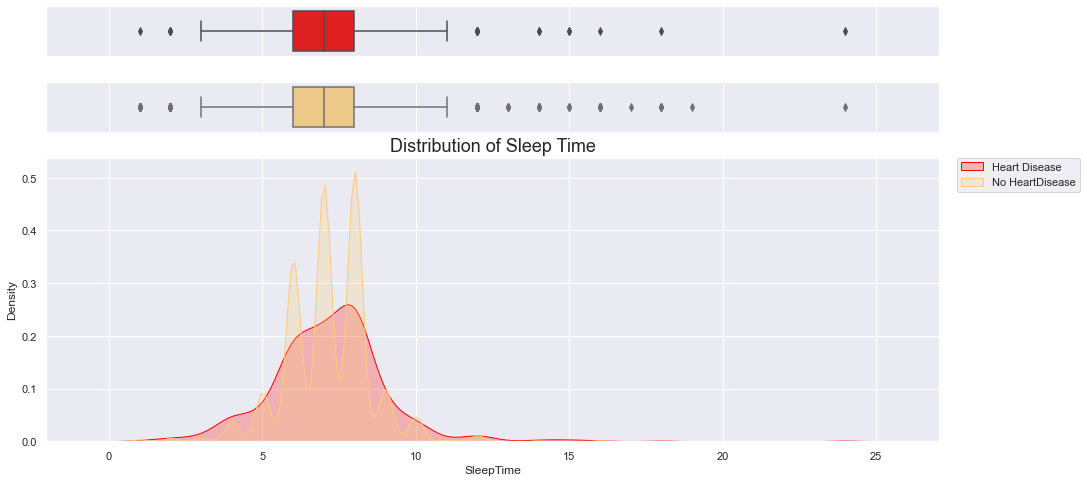

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
# assigning a graph to each ax
sns.boxplot(x=df2[df2['HeartDisease']==1]["SleepTime"], ax=ax_box1, color="red")
sns.kdeplot(df2[df2['HeartDisease']==1]["SleepTime"], ax=ax_hist,shade=True, color="red")

sns.boxplot(x=df2[df2['HeartDisease']==0]["SleepTime"], ax=ax_box2, color="#fccc79")
sns.kdeplot(df2[df2['HeartDisease']==0]["SleepTime"], ax=ax_hist, shade=True,color="#fccc79")

plt.title('Distribution of Sleep Time', fontsize = 18)
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['Heart Disease', 'No HeartDisease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

**Insight:**
The boxplot show that the sleep time distribution is similar for both heart diseaase and non heart disease respondent. Which means that sleep time doesn't influence the riisk of getting heart disease.


##Correlation Analysis

<AxesSubplot:>

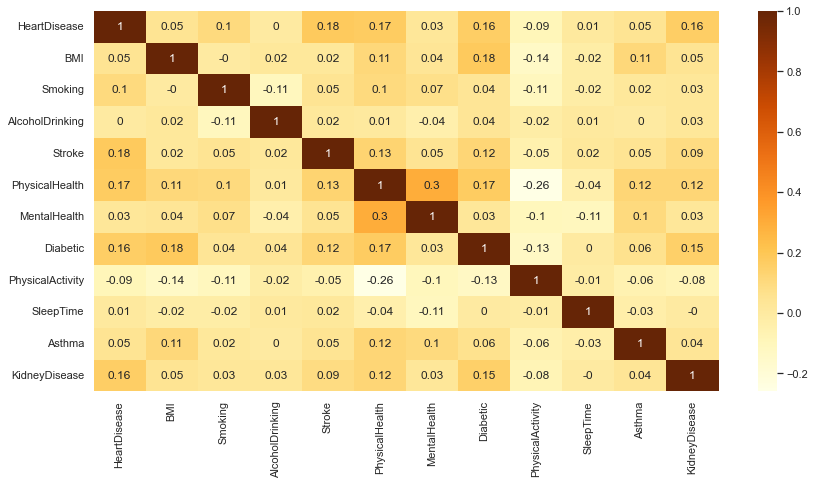

In [ ]:
correlation = df2.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

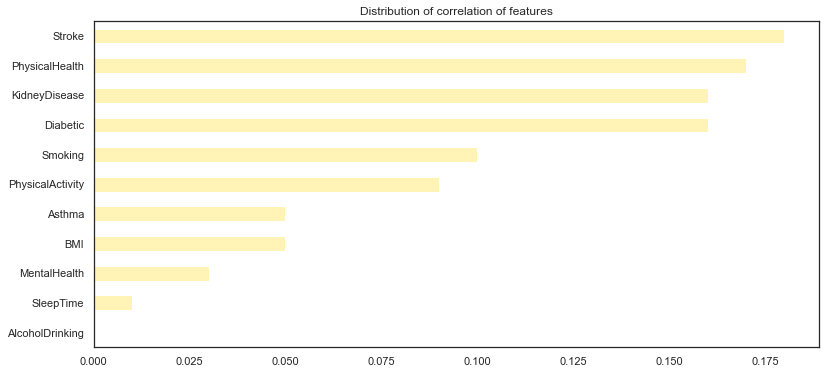

In [ ]:
sns.set_style('white')
sns.set_palette('YlOrBr')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
abs(correlation['HeartDisease']).sort_values()[:-1].plot.barh()
plt.show()

**Insight:**
1. The top 5 highest features that highly correlated with heart disease are Stroke, PhysicalHealth, KidneyDisease, Diabetic and Smoking.
2. Stroke patient have the highest chance to get heart disease.
3. AlcoholDrinking is not correlated with heart disease.

# Prediction Model Building

## Data Examining and Preprocessing for Model Building

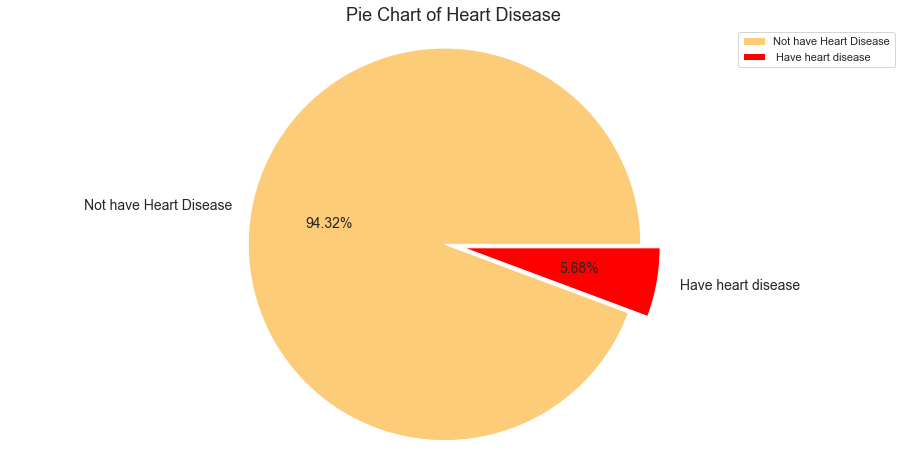

In [ ]:
sizes = df['HeartDisease'].value_counts(sort = True) 
colors = ['#fccc79', 'red']
plt.pie(sizes, labels=['Not have Heart Disease',' Have heart disease'], autopct='%1.2f%%', explode=[0, 0.1],textprops={'fontsize': 14}, colors = colors)
plt.title("Pie Chart of Heart Disease", fontsize=18)
plt.legend(loc='upper right')
plt.axis('equal')  
plt.show()

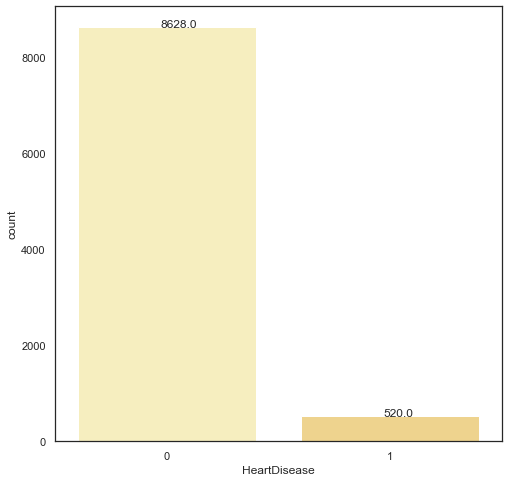

In [ ]:
plt.rcParams['figure.figsize'] = (8, 8)
ax=sns.countplot(x='HeartDisease',data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.37, p.get_height()+0.05))
plt.show()

From the chart above we can see that the label of heart disease variable is highly imbalance with 8628 of answer of "0" which span 94% of the total answer. This will results in the model built tend to biased to the prediction of the majority class which is "0" resulting in low recall perforance or high false negative rate. To prevent this from occurs, random oversampling technique is deployed as follow where examples from the minority class is randomly duplicated and adding them to the dataset until balanced class is obtain.

### Simple Random Oversampling

In [ ]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease
0,0,25.10,0,1,0,0,0,1,1,1,0,1,9,0,0
1,0,25.00,0,1,0,14,0,1,6,1,1,1,8,0,0
2,0,19.97,0,1,0,0,0,0,5,1,0,1,6,0,0
3,0,19.74,1,1,0,0,0,0,6,1,0,1,8,0,0
4,0,27.46,1,1,0,0,0,1,6,1,0,1,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10286,0,19.66,0,1,0,0,0,0,6,1,0,1,8,0,0
10287,0,21.70,1,1,0,0,30,1,1,1,0,1,7,0,0
10288,0,28.80,1,1,0,0,5,1,2,1,0,1,7,0,0
10289,0,26.63,0,1,0,0,0,1,3,5,0,1,9,0,0


In [ ]:
# !pip3 install imblearn

# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

# define dataset
# independent variables
x = df.iloc[:,1:].values
# dependent variable
y = df.iloc[:,0].values

# summarize class distribution
print(Counter(y))


# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
x_over, y_over = oversample.fit_resample(x, y)
# summarize class distribution
print(Counter(y_over))
type(y_over)

Counter({0: 8628, 1: 520})
Counter({0: 8628, 1: 8628})


numpy.ndarray

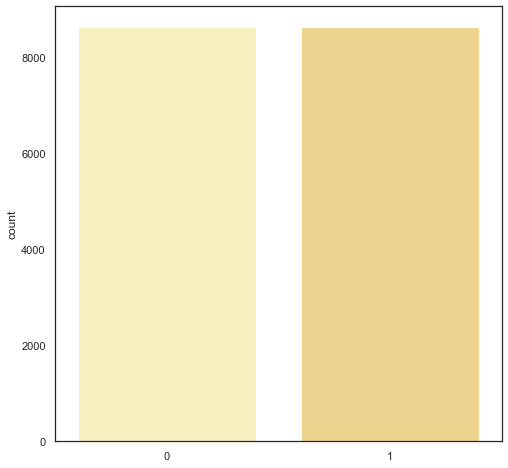

In [ ]:
plt.rcParams['figure.figsize'] = (8, 8)
ax2=sns.countplot(x=y_over)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.37, p.get_height()+0.05))
plt.show()

After oversampling the labels for the Heart Disease variable is balanced with both having 8628 occurence.

## Split Data into Training and Testing Set

In [ ]:
from sklearn.model_selection import train_test_split
# Dividing Dataset into Training and Test Set
# independent variables

X_train, X_test, Y_train, Y_test = train_test_split(x_over, y_over, test_size=0.2)

print("Training and testing data size: ")
print("X_train",len(X_train))
print("X_test",len(X_test))
print("Y_train",len(Y_train))
print("Y_test",len(Y_test))

Training and testing data size: 
X_train 13804
X_test 3452
Y_train 13804
Y_test 3452


## K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import sklearn.metrics as metrics
# declaring a object of K Neighbors Classifier class
model1 = KNeighborsClassifier()
model1.fit(X_train, Y_train)
y_pred1 = model1.predict(X_test)

#### Confusion Matrix

<AxesSubplot:>

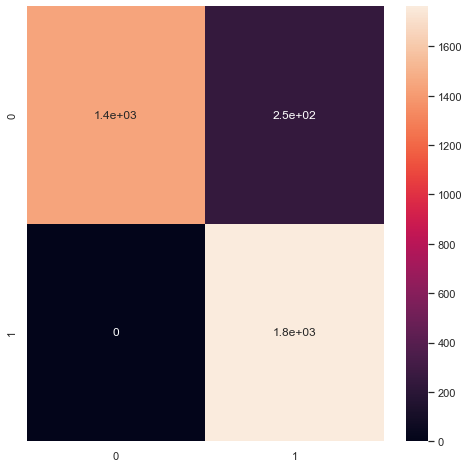

In [ ]:
conf_matrix1=confusion_matrix(Y_test,y_pred1)

conf_matrix = pd.DataFrame(data=conf_matrix1, columns=[0, 1], index=[0, 1])
sns.heatmap(conf_matrix, annot=True)

#### Model Performance

In [ ]:
print("Result:")
print("KNN Model Accuracy : ","{:.2f}".format(accuracy_score(Y_test,y_pred1)))
print("KNN Model Precision : ","{:.2f}".format(precision_score(Y_test,y_pred1)))
print("KNN Model Recall : ","{:.2f}".format(recall_score(Y_test,y_pred1)))
print("KNN Model F1 Score : ","{:.2f}".format(f1_score(Y_test,y_pred1)))

Result:
KNN Model Accuracy :  0.93
KNN Model Precision :  0.88
KNN Model Recall :  1.00
KNN Model F1 Score :  0.93


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
#Training model
model2 = LogisticRegression(random_state=0, max_iter=1000)
model2.fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)


#### Confusion Matrix

<AxesSubplot:>

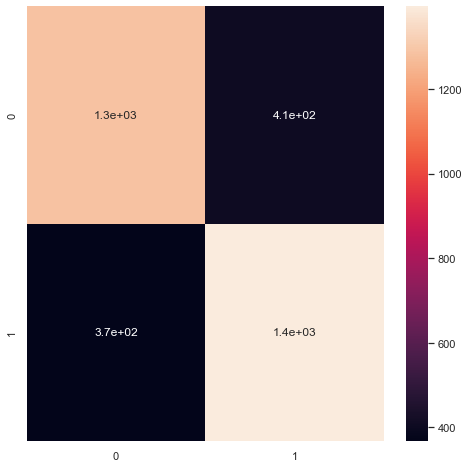

In [ ]:
conf_matrix2=confusion_matrix(Y_test,y_pred2)
conf_matrix2 = pd.DataFrame(data=conf_matrix2, columns=[0, 1], index=[0, 1])
sns.heatmap(conf_matrix2, annot=True)

#### Model Performance

In [ ]:
print('')
print("Result:")
print("Logistic regression Accuracy : ","{:.2f}".format(accuracy_score(Y_test,y_pred2)))
print("Logistic regression Precision : ","{:.2f}".format(precision_score(Y_test,y_pred2)))
print("Logistic regression Recall : ","{:.2f}".format(recall_score(Y_test,y_pred2)))
print("Logistic regression F1 Score : ","{:.2f}".format(f1_score(Y_test,y_pred2)))


Result:
Logistic regression Accuracy :  0.78
Logistic regression Precision :  0.77
Logistic regression Recall :  0.79
Logistic regression F1 Score :  0.78


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model3 =RandomForestClassifier()
model3.fit(X_train,Y_train)
y_pred3 = model3.predict((X_test))

#### Confusion Matrix

<AxesSubplot:>

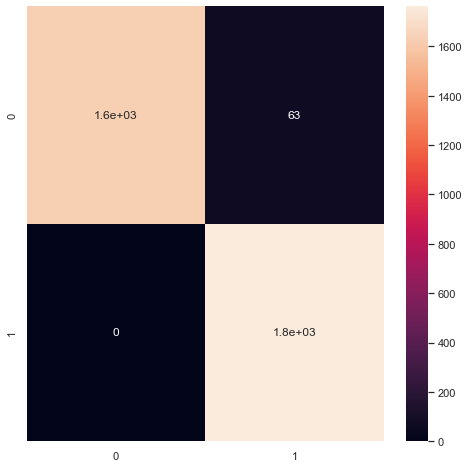

In [ ]:
conf_matrix3=confusion_matrix(Y_test,y_pred3)
conf_matrix3 = pd.DataFrame(data=conf_matrix3, columns=[0, 1], index=[0, 1])
sns.heatmap(conf_matrix3, annot=True)

#### Model Performance

In [ ]:
print("Result:")
print("Random forest Accuracy : ","{:.2f}".format(accuracy_score(Y_test,y_pred3)))
print("Random forest Precision : ","{:.2f}".format(precision_score(Y_test,y_pred3)))
print("Random forest Recall : ","{:.2f}".format(recall_score(Y_test,y_pred3)))


Result:
Random forest Accuracy :  0.98
Random forest Precision :  0.97
Random forest Recall :  1.00


# Model Evaluation

In [ ]:
def evaluate_model(model, X_test, Y_test):
    from sklearn import metrics

    # Predict Test Data 
    Y_pred = model.predict(X_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(Y_test, Y_pred)
    prec = metrics.precision_score(Y_test, Y_pred)
    rec = metrics.recall_score(Y_test, Y_pred)
    f1 = metrics.f1_score(Y_test, Y_pred)
    kappa = metrics.cohen_kappa_score(Y_test, Y_pred)

    # Calculate area under curve (AUC)
    Y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred_proba)
    auc = metrics.roc_auc_score(Y_test, Y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(Y_test, Y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [ ]:
model1_eval = evaluate_model(model1, X_test, Y_test)
model2_eval = evaluate_model(model2, X_test, Y_test)
model3_eval = evaluate_model(model3, X_test, Y_test)

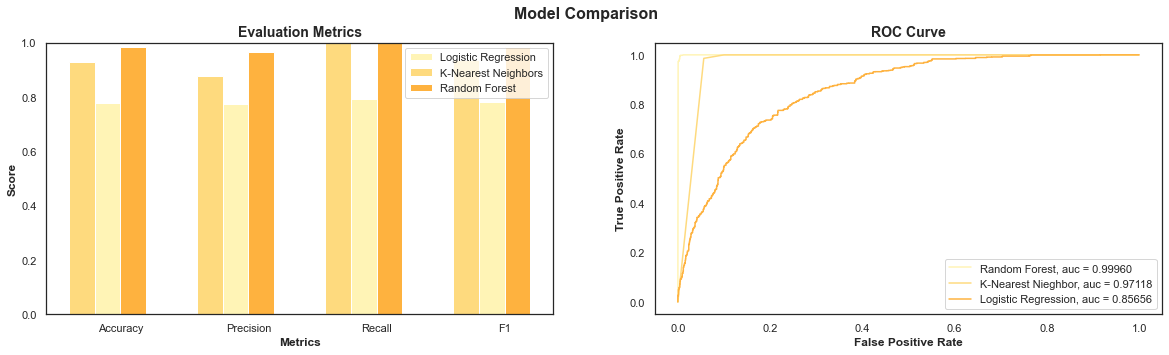

In [ ]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(5)
fig.set_figwidth(20)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
model2_score = [model2_eval['acc'], model2_eval['prec'], model2_eval['rec'], model2_eval['f1']]
model1_score = [model1_eval['acc'], model1_eval['prec'], model1_eval['rec'], model1_eval['f1']]
model3_score = [model3_eval['acc'], model3_eval['prec'], model3_eval['rec'], model3_eval['f1']]

## Set position of bar on X axis
r1 = np.arange(len(model1_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

## Make the plot
ax1.bar(r2, model2_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r1, model1_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r3, model3_score, width=barWidth, edgecolor='white', label='Random Forest')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(model2_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(model3_eval['fpr'], model3_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(model3_eval['auc']))
ax2.plot(model1_eval['fpr'], model1_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(model1_eval['auc']))
ax2.plot(model2_eval['fpr'], model2_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(model2_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)
plt.show()

Random forest model has the highest performance score for accuracy,precision, recall and F1 score followed by K-Nearest Neighbours and lastly is Logistic regression.

Moreover, Random forest model has the highest AUC (Area Under The Curve) of the ROC (Receiver Operating Characteristics) curve where the higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the heart disease and no heart disease.

## Conclusion

![image2.png](attachment:image2.png)

From the results we can see that both three model, have accuracy of above 77%-98%, which is quite excellent performance. However,by comparision of the three model build, we can see that the random forest is the best model to predict the occurance of heart disease with the highest accuracy of 98% which means that Random forest model is able to make high ratio of correct prediction. Moreover, precision value 97% indicated that only 3% false positive results is generated and lastly recall of100% which means no false negative results generated from the model. 
